In [ ]:
import pandas as pd

https://archive.ics.uci.edu/ml/datasets/Heart+Disease

In [ ]:
kokoro = pd.read_csv('heart.csv')

In [ ]:
kokoro.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


id: patient identification number

age: age in years

sex:(1 = male; 0 = female)

cpchest: pain type

trestbps: resting blood pressure (in mm Hg on admission to the hospital)

chol: serum cholestoral in mg/dl

fbs: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

restecg: resting electrocardiographic results

thalach: maximum heart rate achieved

exang: exercise induced angina (1 = yes; 0 = no)

oldpeak: ST depression induced by exercise relative to rest

slope: the slope of the peak exercise ST segment

ca: number of major vessels (0-3) colored by flourosopy

thal: 3 = normal; 6 = fixed defect; 7 = reversable defect

target: 1= Yes. Has heart disease, 0=No. Does not have heart disease

In [ ]:
kokoro.shape

(303, 14)

In [ ]:
import seaborn as sns

## Verificando se as classes estão balanceadas

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


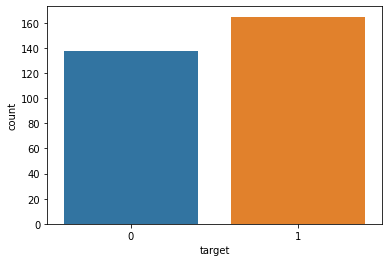

In [ ]:
sns.countplot('target', data=kokoro)

## Dando nome para as categorias

In [ ]:
kokoro['sex'][kokoro['sex'] == 0] = 'Female'
kokoro['sex'][kokoro['sex'] == 1] = 'Male'

kokoro['cp'][kokoro['cp'] == 0] = 'Typical angina'
kokoro['cp'][kokoro['cp'] == 1] = 'Atypical angina'
kokoro['cp'][kokoro['cp'] == 2] = 'Non-anginal pain'
kokoro['cp'][kokoro['cp'] == 3] = 'Asymptomatic'

kokoro['fbs'][kokoro['fbs'] == 0] = 'Lower than 120mg/ml'
kokoro['fbs'][kokoro['fbs'] == 1] = 'Greater than 120mg/ml'

kokoro['restecg'][kokoro['restecg'] == 0] = 'Normal'
kokoro['restecg'][kokoro['restecg'] == 1] = 'ST-T wave abnormality'
kokoro['restecg'][kokoro['restecg'] == 2] = 'Left ventricular hypertrophy'

kokoro['exang'][kokoro['exang'] == 0] = 'No'
kokoro['exang'][kokoro['exang'] == 1] = 'Yes'

kokoro['slope'][kokoro['slope'] == 0] = 'Upsloping'
kokoro['slope'][kokoro['slope'] == 1] = 'Flat'
kokoro['slope'][kokoro['slope'] == 2] = 'Downsloping'

kokoro['thal'][kokoro['thal'] == 1] = 'Normal'
kokoro['thal'][kokoro['thal'] == 2] = 'Fixed defect'
kokoro['thal'][kokoro['thal'] == 3] = 'Reversable defect'

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main_

In [ ]:
import seaborn as sns

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


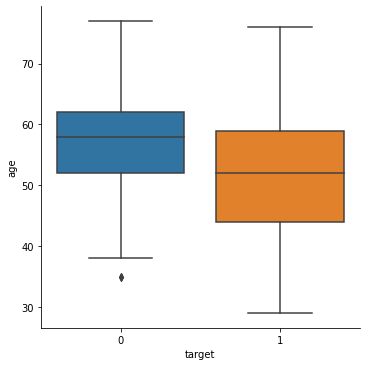

In [ ]:
sns.catplot('target','age', data=kokoro, kind='box')

In [ ]:
kokoro.drop('trestbps', axis=1, inplace=True)
kokoro.drop('chol', axis=1, inplace=True)
kokoro.drop('restecg', axis=1, inplace=True)
kokoro.drop('fbs', axis=1, inplace=True)
kokoro.head()

,age,sex,cp,thalach,exang,oldpeak,slope,ca,thal,target
0,63,Male,Asymptomatic,150,No,2.3,Upsloping,0,Normal,1
1,37,Male,Non-anginal pain,187,No,3.5,Upsloping,0,Fixed defect,1
2,41,Female,Atypical angina,172,No,1.4,Downsloping,0,Fixed defect,1
3,56,Male,Atypical angina,178,No,0.8,Downsloping,0,Fixed defect,1
4,57,Female,Typical angina,163,Yes,0.6,Downsloping,0,Fixed defect,1


## Tratando as variáveis categóricas

In [ ]:
kokoro_final = pd.get_dummies(kokoro) #,drop_first = True

In [ ]:
kokoro.columns

Index(['age', 'sex', 'cp', 'thalach', 'exang', 'oldpeak', 'slope', 'ca',
       'thal', 'target'],
      dtype='object')

In [ ]:
kokoro_final.columns

Index(['age', 'thalach', 'oldpeak', 'ca', 'target', 'sex_Female', 'sex_Male',
       'cp_Asymptomatic', 'cp_Atypical angina', 'cp_Non-anginal pain',
       'cp_Typical angina', 'exang_No', 'exang_Yes', 'slope_Downsloping',
       'slope_Flat', 'slope_Upsloping', 'thal_0', 'thal_Fixed defect',
       'thal_Normal', 'thal_Reversable defect'],
      dtype='object')

In [ ]:
cols = kokoro_final.columns.to_list()

In [ ]:
cols[0:4]+cols[5:]+['target']

['age',
 'thalach',
 'oldpeak',
 'ca',
 'sex_Female',
 'sex_Male',
 'cp_Asymptomatic',
 'cp_Atypical angina',
 'cp_Non-anginal pain',
 'cp_Typical angina',
 'exang_No',
 'exang_Yes',
 'slope_Downsloping',
 'slope_Flat',
 'slope_Upsloping',
 'thal_0',
 'thal_Fixed defect',
 'thal_Normal',
 'thal_Reversable defect',
 'target']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = kokoro_final[cols[0:4]+cols[5:]]

In [ ]:
X.head()

,age,thalach,oldpeak,ca,sex_Female,sex_Male,cp_Asymptomatic,cp_Atypical angina,cp_Non-anginal pain,cp_Typical angina,exang_No,exang_Yes,slope_Downsloping,slope_Flat,slope_Upsloping,thal_0,thal_Fixed defect,thal_Normal,thal_Reversable defect
0,63,150,2.3,0,0,1,1,0,0,0,1,0,0,0,1,0,0,1,0
1,37,187,3.5,0,0,1,0,0,1,0,1,0,0,0,1,0,1,0,0
2,41,172,1.4,0,1,0,0,1,0,0,1,0,1,0,0,0,1,0,0
3,56,178,0.8,0,0,1,0,1,0,0,1,0,1,0,0,0,1,0,0
4,57,163,0.6,0,1,0,0,0,0,1,0,1,1,0,0,0,1,0,0


In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()

In [ ]:
scaler.fit(X)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [ ]:
X_t = scaler.transform(X)

In [ ]:
X_t

array([[ 0.9521966 ,  0.01544279,  1.08733806, ..., -1.10076284,
         3.97911213, -0.79311554],
       [-1.91531289,  1.63347147,  2.12257273, ...,  0.9084609 ,
        -0.25131234, -0.79311554],
       [-1.47415758,  0.97751389,  0.31091206, ...,  0.9084609 ,
        -0.25131234, -0.79311554],
       ...,
       [ 1.50364073, -0.37813176,  2.03630317, ..., -1.10076284,
        -0.25131234,  1.26085034],
       [ 0.29046364, -1.51512489,  0.13837295, ..., -1.10076284,
        -0.25131234,  1.26085034],
       [ 0.29046364,  1.0649749 , -0.89686172, ...,  0.9084609 ,
        -0.25131234, -0.79311554]])

In [ ]:
y = kokoro_final['target']

In [ ]:
X_treino, X_teste, y_treino, y_teste = train_test_split(X_t,y, test_size =.2, stratify=y, random_state=10)

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
def gera_resultados(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                    intercept_scaling=1, l1_ratio=None, max_iter=100,
                    multi_class='auto', n_jobs=None, penalty='l2',
                    random_state=12, solver='lbfgs', tol=0.0001, verbose=0,
                    warm_start=False):
  modelo = LogisticRegression(C=C, class_weight=class_weight, dual=dual, fit_intercept=fit_intercept,
                    intercept_scaling=intercept_scaling, l1_ratio=l1_ratio, max_iter=max_iter,
                    multi_class=multi_class, n_jobs=n_jobs, penalty=penalty,
                    random_state=12, solver=solver, tol=tol, verbose=verbose,
                    warm_start=warm_start)
  modelo.fit(X_treino,y_treino)
  pred = modelo.predict(X_teste)
  print('Acurácia:')
  print(modelo.score(X_teste,y_teste))
  matriz_de_confusao = confusion_matrix(y_teste, pred)
  sns.heatmap(matriz_de_confusao, annot=True,cmap='Blues')
  



Acurácia:
0.8524590163934426


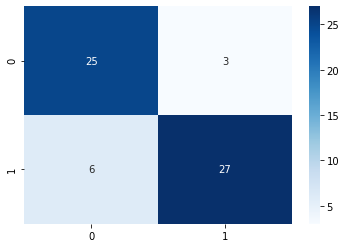

In [ ]:
gera_resultados(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                    intercept_scaling=1, l1_ratio=0.5, max_iter=100,
                    multi_class='auto', n_jobs=None, penalty='elasticnet',
                    random_state=12, solver='lbfgs', tol=0.0001, verbose=0,
                    warm_start=False)

In [ ]:
X.shape

(303, 19)

Acurácia:
0.45901639344262296


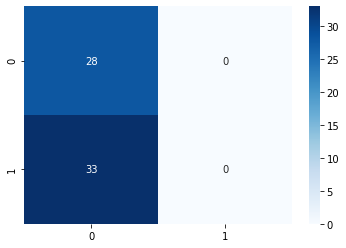

In [ ]:
gera_resultados(C=0.0005, class_weight='balanced', dual=False, fit_intercept=True,
                    intercept_scaling=1, l1_ratio=0.1, max_iter=100,
                    multi_class='ovr', n_jobs=None, penalty='elasticnet',
                    random_state=13, solver='saga', tol=0.0001, verbose=0,
                    warm_start=False)

In [ ]:
https://shap.readthedocs.io/en/latest/

https://pypi.org/project/sweetviz/

https://pandas-profiling.github.io/pandas-profiling/docs/master/rtd/